# Probe Method Single Day

## Standard

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and observations
positions = np.arange(6)  # Positions 0 through 5 (corresponding to 1-6 in problem)
observations = ['Deviant', 'No deviant']

# Step 1: Initialize prior belief (biased towards position 4)
def initialize_priors():
    dirichlet_prior_belief = np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])  # Example prior belief
    weighted_counts = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    return dirichlet_prior_belief, weighted_counts

# Step 2: Gradually update the prior based on the observed deviant location with recency-based decay
def update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha):    
    #updating exponential weighted sum
    for pos in range(len(weighted_counts)):
        Ct = 0
        if (deviant_position == pos):
            Ct = 1

        weighted_counts[pos] = alpha * Ct + (1 - alpha) * weighted_counts[pos]

    # Track the recent history of deviants
    deviant_history.append(deviant_position)
    
    # Initialize the updated prior as a copy of the original prior
    updated_dirichlet_prior = dirichlet_prior_belief.copy()

    denominator = 0
    for pos in range(len(updated_dirichlet_prior)):
        denominator += weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008### SHOULD BE - 1 TERM HERE

    for pos in range(len(updated_dirichlet_prior)):
        numerator = weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008 ### SHOULD BE - 1 TERM HERE

        updated_dirichlet_prior[pos] = numerator / denominator


    return updated_dirichlet_prior, deviant_history

# Step 3: Run trials and update beliefs
def run_standard_trials(dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history, n_trials, alpha):
    if (dirichlet_prior_belief is None or weighted_counts is None or belief_over_time is None or deviant_history is None):
        belief_over_time = []  # Store belief at each trial
        deviant_history = []  # Track history of observed deviants
    
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief, weighted_counts = initialize_priors()
    else:
        belief_over_time = belief_over_time  # Store belief at each trial
        deviant_history = deviant_history  # Track history of observed deviants
        
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief = dirichlet_prior_belief
        weighted_counts = weighted_counts
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        deviant_position = np.random.randint(3, 6)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        dirichlet_prior_belief, deviant_history = update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(dirichlet_prior_belief.copy())
    
    return dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history

# Step 4: Plot the belief evolution over time
def plot_belief_evolution(belief_over_time, trials_to_demarcate=None, labels=None):
    plt.figure(figsize=(10, 6))
    
    # Loop through positions, but label position 7 as "No deviant"
    for i in range(6):  # Only plot positions 1 through 6 (0 to 5)
        plt.plot(belief_over_time[:, i], label=f"Position {i+1}")
    
    # Plot position 7 as "No deviant"
    plt.plot(belief_over_time[:, 6], label="No deviant", linestyle='dashed', color='black')

    # If trials_to_demarcate and labels are provided, add vertical lines and different labels
    if trials_to_demarcate is not None and labels is not None:
        for trial, label in zip(trials_to_demarcate, labels):
            plt.axvline(x=trial, color='red', linestyle='--', label=None)
            plt.text(trial + 5, 0.45, label, color='red')  # Adjust position as needed
    
    plt.xlabel("Trial")
    plt.ylabel("Belief")
    plt.title("Evolution of Belief Over Time (Gradual Updates)")
    plt.legend()
    plt.show()

## Probe

In [3]:
# Step 3: Run trials and update beliefs
def run_probe_trials(dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history, n_trials, alpha):
    if (dirichlet_prior_belief is None or weighted_counts is None or belief_over_time is None or deviant_history is None):
        belief_over_time = []  # Store belief at each trial
        deviant_history = []  # Track history of observed deviants
    
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief, weighted_counts = initialize_priors()
    else:
        belief_over_time = belief_over_time  # Store belief at each trial
        deviant_history = deviant_history  # Track history of observed deviants
        
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief = dirichlet_prior_belief
        weighted_counts = weighted_counts
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        positions = [3, 4, 5, 6]
        probabilities = [0.95/3, 0.95/3, 0.95/3, 0.05]  # 60% for positions 3, 4, 5; 40% for position 7
        deviant_position = np.random.choice(positions, size=1, p=probabilities)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        dirichlet_prior_belief, deviant_history = update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(dirichlet_prior_belief.copy())
    
    return dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history

## Catch

In [4]:
# Step 3: Run trials and update beliefs
def run_catch_trials(dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history, n_trials, alpha):
    if (dirichlet_prior_belief is None or weighted_counts is None or belief_over_time is None or deviant_history is None):
        belief_over_time = []  # Store belief at each trial
        deviant_history = []  # Track history of observed deviants
    
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief, weighted_counts = initialize_priors()
    else:
        belief_over_time = belief_over_time  # Store belief at each trial
        deviant_history = deviant_history  # Track history of observed deviants
        
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief = dirichlet_prior_belief
        weighted_counts = weighted_counts
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        positions = [3, 4, 5, 6]
        probabilities = [0.6/3, 0.6/3, 0.6/3, 0.4]  # 60% for positions 3, 4, 5; 40% for position 7
        deviant_position = np.random.choice(positions, size=1, p=probabilities)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        dirichlet_prior_belief, deviant_history = update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(dirichlet_prior_belief.copy())
    
    return dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history

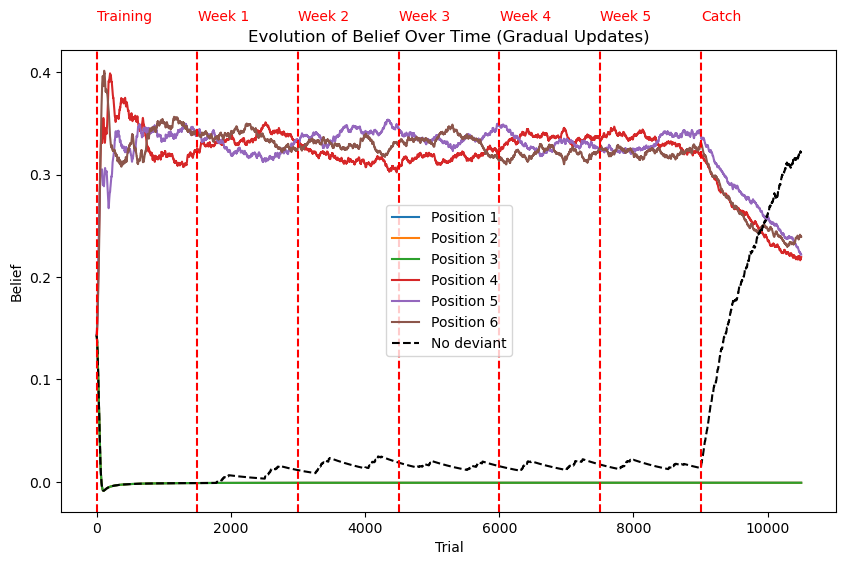

In [15]:
#Training Phase (0 - 1500) ---- 250 = 1 day, 1500 = 6 days
#training_prior, training_counts, training_beliefs, training_deviants = run_standard_trials(None, None, None, None, n_trials = 1500, alpha=0.001)
standard_dirichlet_prior_belief, standard_weighted_counts, standard_belief_over_time, standard_deviant_history = run_standard_trials(None, None, None, None, n_trials = 1500, alpha=0.001)


for i in range(5):
    standard_dirichlet_prior_belief, standard_weighted_counts, standard_belief_over_time, standard_deviant_history = run_standard_trials(standard_dirichlet_prior_belief.copy(), standard_weighted_counts.copy(), standard_belief_over_time.copy(), standard_deviant_history.copy(), n_trials = 250, alpha=0.001)
    probe_dirichlet_prior_belief, probe_weighted_counts, probe_belief_over_time, probe_deviant_history = run_probe_trials(standard_dirichlet_prior_belief.copy(), standard_weighted_counts.copy(), standard_belief_over_time.copy(), standard_deviant_history.copy(), n_trials = 250, alpha=0.001)
    standard_dirichlet_prior_belief, standard_weighted_counts, standard_belief_over_time, standard_deviant_history = run_standard_trials(probe_dirichlet_prior_belief.copy(), probe_weighted_counts.copy(), probe_belief_over_time.copy(), probe_deviant_history.copy(), n_trials = 500, alpha=0.001)
    probe_dirichlet_prior_belief, probe_weighted_counts, probe_belief_over_time, probe_deviant_history = run_probe_trials(standard_dirichlet_prior_belief.copy(), standard_weighted_counts.copy(), standard_belief_over_time.copy(), standard_deviant_history.copy(), n_trials = 250, alpha=0.001)
    standard_dirichlet_prior_belief, standard_weighted_counts, standard_belief_over_time, standard_deviant_history = run_standard_trials(probe_dirichlet_prior_belief.copy(), probe_weighted_counts.copy(), probe_belief_over_time.copy(), probe_deviant_history.copy(), n_trials = 250, alpha=0.001)

catch_dirichlet_prior_belief, catch_weighted_counts, catch_belief_over_time, catch_deviant_history = run_catch_trials(standard_dirichlet_prior_belief.copy(), standard_weighted_counts.copy(), standard_belief_over_time.copy(), standard_deviant_history.copy(), n_trials = 1500, alpha=0.001)


trials_to_demarcate = [0, 1500, 3000, 4500, 6000, 7500, 9000]  # Example: demarcate trials 100, 500, and 800
labels = ["Training", "Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Catch"]

catch_belief_over_time_graph = np.array(catch_belief_over_time).copy()
# Plot the belief evolution over time
plot_belief_evolution(catch_belief_over_time_graph, trials_to_demarcate, labels)

# Probe Method Over week

## Standard

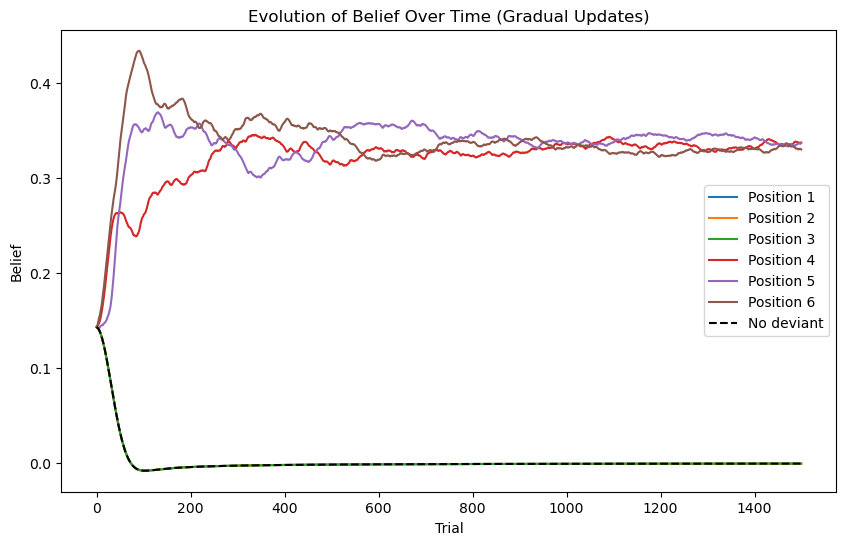

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and observations
positions = np.arange(6)  # Positions 0 through 5 (corresponding to 1-6 in problem)
observations = ['Deviant', 'No deviant']

# Step 1: Initialize prior belief (biased towards position 4)
def initialize_priors():
    dirichlet_prior_belief = np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])  # Example prior belief
    weighted_counts = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    return dirichlet_prior_belief, weighted_counts

# Step 2: Gradually update the prior based on the observed deviant location with recency-based decay
def update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha):    
    #updating exponential weighted sum
    for pos in range(len(weighted_counts)):
        Ct = 0
        if (deviant_position == pos):
            Ct = 1

        weighted_counts[pos] = alpha * Ct + (1 - alpha) * weighted_counts[pos]

    # Track the recent history of deviants
    deviant_history.append(deviant_position)
    
    # Initialize the updated prior as a copy of the original prior
    updated_dirichlet_prior = dirichlet_prior_belief.copy()

    denominator = 0
    for pos in range(len(updated_dirichlet_prior)):
        denominator += weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008### SHOULD BE - 1 TERM HERE

    for pos in range(len(updated_dirichlet_prior)):
        numerator = weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008 ### SHOULD BE - 1 TERM HERE

        updated_dirichlet_prior[pos] = numerator / denominator


    return updated_dirichlet_prior, deviant_history

# Step 3: Run trials and update beliefs
def run_trials(dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history, n_trials, alpha):
    if (dirichlet_prior_belief is None or weighted_counts is None or belief_over_time is None or deviant_history is None):
        belief_over_time = []  # Store belief at each trial
        deviant_history = []  # Track history of observed deviants
    
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief, weighted_counts = initialize_priors()
    else:
        belief_over_time = belief_over_time  # Store belief at each trial
        deviant_history = deviant_history  # Track history of observed deviants
        
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief = dirichlet_prior_belief
        weighted_counts = weighted_counts
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        deviant_position = np.random.randint(3, 6)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        dirichlet_prior_belief, deviant_history = update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(dirichlet_prior_belief.copy())
    
    return dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history

# Step 4: Plot the belief evolution over time
def plot_belief_evolution(belief_over_time):
    plt.figure(figsize=(10, 6))
    
    # Loop through positions, but label position 7 as "No deviant"
    for i in range(6):  # Only plot positions 1 through 6 (0 to 5)
        plt.plot(belief_over_time[:, i], label=f"Position {i+1}")
    
    # Plot position 7 as "No deviant"
    plt.plot(belief_over_time[:, 6], label="No deviant", linestyle='dashed', color='black')

    plt.xlabel("Trial")
    plt.ylabel("Belief")
    plt.title("Evolution of Belief Over Time (Gradual Updates)")
    plt.legend()
    plt.show()


# Step 5: Run the trials and visualize the belief evolution
n_trials = 1500  # Number of trials to simulate
standard_dirichlet_prior_belief, standard_weighted_counts, standard_belief_over_time, standard_deviant_history = run_trials(None, None, None, None, n_trials, alpha=0.001)

standard_belief_over_time_graph = np.array(standard_belief_over_time).copy()
# Plot the belief evolution over time
plot_belief_evolution(standard_belief_over_time_graph)

## Probe

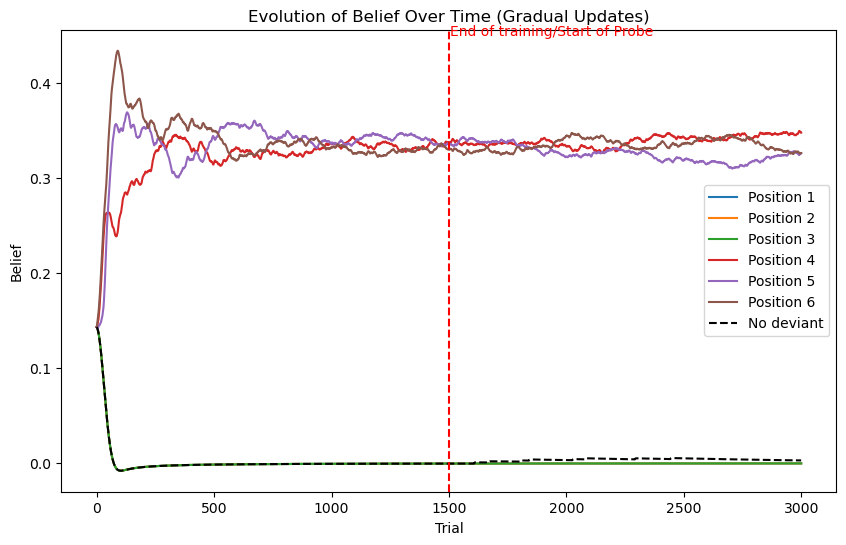

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and observations
positions = np.arange(6)  # Positions 0 through 5 (corresponding to 1-6 in problem)
observations = ['Deviant', 'No deviant']

# Step 1: Initialize prior belief (biased towards position 4)
def initialize_priors():
    dirichlet_prior_belief = np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])  # Example prior belief
    weighted_counts = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    return dirichlet_prior_belief, weighted_counts

# Step 2: Gradually update the prior based on the observed deviant location with recency-based decay
def update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha):    
    #updating exponential weighted sum
    for pos in range(len(weighted_counts)):
        Ct = 0
        if (deviant_position == pos):
            Ct = 1

        weighted_counts[pos] = alpha * Ct + (1 - alpha) * weighted_counts[pos]

    # Track the recent history of deviants
    deviant_history.append(deviant_position)
    
    # Initialize the updated prior as a copy of the original prior
    updated_dirichlet_prior = dirichlet_prior_belief.copy()

    denominator = 0
    for pos in range(len(updated_dirichlet_prior)):
        denominator += weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008### SHOULD BE - 1 TERM HERE

    for pos in range(len(updated_dirichlet_prior)):
        numerator = weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008 ### SHOULD BE - 1 TERM HERE

        updated_dirichlet_prior[pos] = numerator / denominator


    return updated_dirichlet_prior, deviant_history

# Step 3: Run trials and update beliefs
def run_trials(dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history, n_trials, alpha):
    if (dirichlet_prior_belief is None or weighted_counts is None or belief_over_time is None or deviant_history is None):
        belief_over_time = []  # Store belief at each trial
        deviant_history = []  # Track history of observed deviants
    
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief, weighted_counts = initialize_priors()
    else:
        belief_over_time = belief_over_time  # Store belief at each trial
        deviant_history = deviant_history  # Track history of observed deviants
        
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief = dirichlet_prior_belief
        weighted_counts = weighted_counts
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        positions = [3, 4, 5, 6]
        probabilities = [(1-(12.5/1500)/3), (1-(12.5/1500)/3), (1-(12.5/1500)/3), 12.5/1500] 
        # Calculate the total sum of the probabilities
        total_sum = sum(probabilities)

        # Normalize the probabilities so that they sum to 1
        normalized_probabilities = [p / total_sum for p in probabilities]
        deviant_position = np.random.choice(positions, size=1, p=normalized_probabilities)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        dirichlet_prior_belief, deviant_history = update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(dirichlet_prior_belief.copy())
    
    return dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history

# Step 4: Plot the belief evolution over time
def plot_belief_evolution(belief_over_time, trials_to_demarcate=None, labels=None):
    plt.figure(figsize=(10, 6))
    
    # Loop through positions, but label position 7 as "No deviant"
    for i in range(6):  # Only plot positions 1 through 6 (0 to 5)
        plt.plot(belief_over_time[:, i], label=f"Position {i+1}")
    
    # Plot position 7 as "No deviant"
    plt.plot(belief_over_time[:, 6], label="No deviant", linestyle='dashed', color='black')

    # If trials_to_demarcate and labels are provided, add vertical lines and different labels
    if trials_to_demarcate is not None and labels is not None:
        for trial, label in zip(trials_to_demarcate, labels):
            plt.axvline(x=trial, color='red', linestyle='--', label=None)
            plt.text(trial + 5, 0.45, label, color='red')  # Adjust position as needed
    
    plt.xlabel("Trial")
    plt.ylabel("Belief")
    plt.title("Evolution of Belief Over Time (Gradual Updates)")
    plt.legend()
    plt.show()


# Step 5: Run the trials and visualize the belief evolution
n_trials = 1500  # Number of trials to simulate
probe_dirichlet_prior_belief, probe_weighted_counts, probe_belief_over_time, probe_deviant_history = run_trials(standard_dirichlet_prior_belief.copy(), standard_weighted_counts.copy(), standard_belief_over_time.copy(), standard_deviant_history.copy(), n_trials, alpha=0.001)


# Specify multiple trials to demarcate
trials_to_demarcate = [1500]  # Example: demarcate trials 100, 500, and 800
labels = ["End of training/Start of Probe"]


probe_belief_over_time_graph = np.array(probe_belief_over_time).copy()
# Plot the belief evolution over time
plot_belief_evolution(probe_belief_over_time_graph, trials_to_demarcate, labels)

## Catch

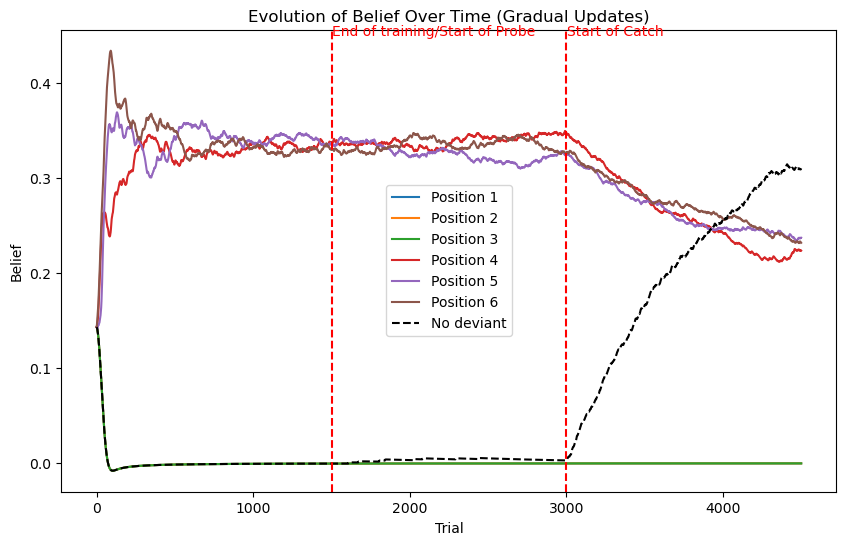

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and observations
positions = np.arange(6)  # Positions 0 through 5 (corresponding to 1-6 in problem)
observations = ['Deviant', 'No deviant']

# Step 1: Initialize prior belief (biased towards position 4)
def initialize_priors():
    dirichlet_prior_belief = np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])  # Example prior belief
    weighted_counts = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    return dirichlet_prior_belief, weighted_counts

# Step 2: Gradually update the prior based on the observed deviant location with recency-based decay
def update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha):    
    #updating exponential weighted sum
    for pos in range(len(weighted_counts)):
        Ct = 0
        if (deviant_position == pos):
            Ct = 1

        weighted_counts[pos] = alpha * Ct + (1 - alpha) * weighted_counts[pos]

    # Track the recent history of deviants
    deviant_history.append(deviant_position)
    
    # Initialize the updated prior as a copy of the original prior
    updated_dirichlet_prior = dirichlet_prior_belief.copy()

    denominator = 0
    for pos in range(len(updated_dirichlet_prior)):
        denominator += weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008### SHOULD BE - 1 TERM HERE

    for pos in range(len(updated_dirichlet_prior)):
        numerator = weighted_counts[pos].copy() + updated_dirichlet_prior[pos].copy() - 0.0008 ### SHOULD BE - 1 TERM HERE

        updated_dirichlet_prior[pos] = numerator / denominator


    return updated_dirichlet_prior, deviant_history

# Step 3: Run trials and update beliefs
def run_trials(dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history, n_trials, alpha):
    if (dirichlet_prior_belief is None or weighted_counts is None or belief_over_time is None or deviant_history is None):
        belief_over_time = []  # Store belief at each trial
        deviant_history = []  # Track history of observed deviants
    
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief, weighted_counts = initialize_priors()
    else:
        belief_over_time = belief_over_time  # Store belief at each trial
        deviant_history = deviant_history  # Track history of observed deviants
        
        # Initialize prior belief (even distribution across all positions initially)
        dirichlet_prior_belief = dirichlet_prior_belief
        weighted_counts = weighted_counts
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        positions = [3, 4, 5, 6]
        probabilities = [0.6/3, 0.6/3, 0.6/3, 0.4]  # 60% for positions 3, 4, 5; 40% for position 7
        deviant_position = np.random.choice(positions, size=1, p=probabilities)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        dirichlet_prior_belief, deviant_history = update_priors_simplified(weighted_counts, dirichlet_prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(dirichlet_prior_belief.copy())
    
    return dirichlet_prior_belief, weighted_counts, belief_over_time, deviant_history

# Step 4: Plot the belief evolution over time
def plot_belief_evolution(belief_over_time, trials_to_demarcate=None, labels=None):
    plt.figure(figsize=(10, 6))
    
    # Loop through positions, but label position 7 as "No deviant"
    for i in range(6):  # Only plot positions 1 through 6 (0 to 5)
        plt.plot(belief_over_time[:, i], label=f"Position {i+1}")
    
    # Plot position 7 as "No deviant"
    plt.plot(belief_over_time[:, 6], label="No deviant", linestyle='dashed', color='black')

    # If trials_to_demarcate and labels are provided, add vertical lines and different labels
    if trials_to_demarcate is not None and labels is not None:
        for trial, label in zip(trials_to_demarcate, labels):
            plt.axvline(x=trial, color='red', linestyle='--', label=None)
            plt.text(trial + 5, 0.45, label, color='red')  # Adjust position as needed
    
    plt.xlabel("Trial")
    plt.ylabel("Belief")
    plt.title("Evolution of Belief Over Time (Gradual Updates)")
    plt.legend()
    plt.show()



# Step 5: Run the trials and visualize the belief evolution
n_trials = 1500  # Number of trials to simulate
catch_dirichlet_prior_belief, catch_weighted_counts, catch_belief_over_time, catch_deviant_history = run_trials(probe_dirichlet_prior_belief.copy(), probe_weighted_counts.copy(), probe_belief_over_time.copy(), probe_deviant_history.copy(), n_trials, alpha=0.001)

trials_to_demarcate = [1500, 3000]  # Example: demarcate trials 100, 500, and 800
labels = ["End of training/Start of Probe", "Start of Catch"]

catch_belief_over_time_graph = np.array(catch_belief_over_time).copy()
# Plot the belief evolution over time
plot_belief_evolution(catch_belief_over_time_graph, trials_to_demarcate, labels)